In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Running the Regression for a Single Bin

Import the regression function and some utility libraries

In [2]:
%matplotlib inline
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
import LOTUS_regression.tests as tests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

Load in some example data, first our predictors.

<Axes: xlabel='time'>

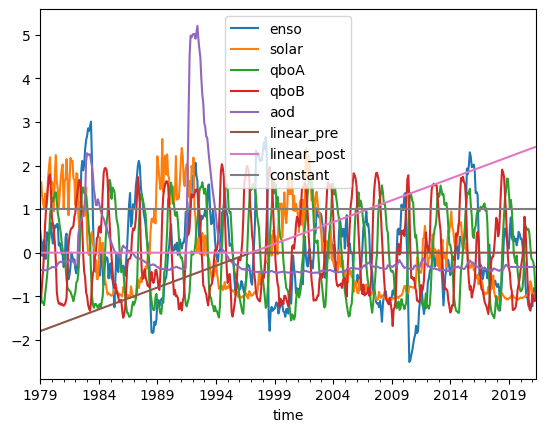

In [3]:
predictors = load_data('pred_baseline_pwlt.csv')

predictors.plot()

Load in one latitude bin of SAGE 2/OSIRIS/OMPS merged relative anomalies

<Axes: xlabel='time'>

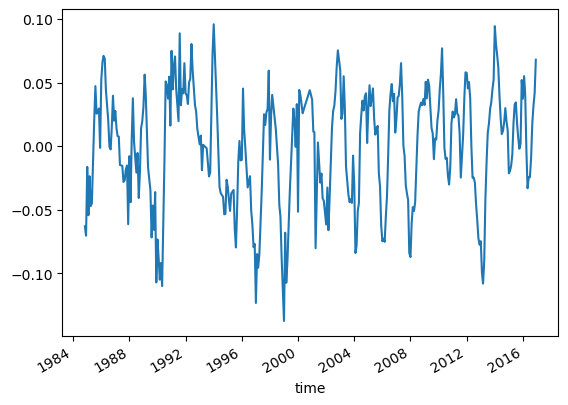

In [4]:
s2_omps_osiris = tests.load_example_data('S2_OSIRIS_OMPS_alt_nd_sample.csv')

plt.figure()
s2_omps_osiris['relative_anomaly'].plot()

Convert data to raw arrays

In [5]:
predictors, s2_omps_osiris = pd.DataFrame.align(predictors, s2_omps_osiris, axis=0)

# (nsamples, npredictors) matrix
X = predictors.values

# (nsamples) array of observations
Y = s2_omps_osiris['relative_anomaly'].values

And Perform the regression

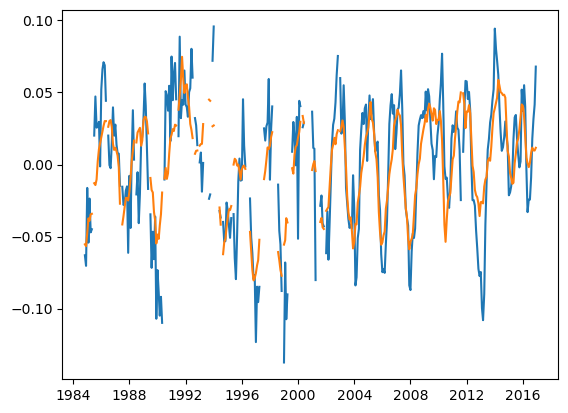

In [6]:
regression_output = mzm_regression(X, Y)

plt.figure()
plt.plot(s2_omps_osiris.index, Y)

plt.plot(s2_omps_osiris.index, regression_output['fit_values'])